# Análisis Exploratorio de Datos (EDA)
## Proyecto: Análisis de comportamiento de clientes - ComercioYA

Autor: Cintia García Ortega  
Fecha: 23-02-2026


## Introducción

El objetivo de este trabajo es aplicar técnicas de Análisis Exploratorio de Datos (EDA) para comprender el comportamiento de los clientes de una tienda online ficticia llamada ComercioYA.

Para ello se generó un dataset simulado con información sobre visitas al sitio, número de compras, monto gastado, devoluciones y calificación de los clientes.

A través de estadísticas descriptivas, análisis de correlación, modelos de regresión y visualizaciones gráficas se busca identificar patrones y relaciones entre las variables que puedan aportar información útil para la toma de decisiones comerciales.


## Contexto del análisis

Para desarrollar este proyecto se generará un conjunto de datos simulado que representa el comportamiento de clientes de una empresa ficticia de comercio electrónico llamada ComercioYA.

El dataset creado va a considerar variables relacionadas con visitas al sitio web, número de compras, monto total gastado, devoluciones y evaluación del servicio por parte del cliente; y a partir de estos datos se realizará un análisis exploratorio para identificar patrones, relaciones entre variables y posibles modelos predictivos.


## Metodología

El análisis se desarrolló siguiendo las distintas etapas del proceso de análisis exploratorio de datos:

1. Generación y exploración inicial del dataset
2. Aplicación de estadística descriptiva
3. Análisis de correlación entre variables
4. Modelado mediante regresión lineal
5. Visualización avanzada con Seaborn
6. Visualización personalizada con Matplotlib

Cada una de estas etapas se desarrolla a continuación dentro del cuaderno.

# Lección 1: Análisis Exploratorio de Datos (EDA)

## Objetivo
En esta primera etapa se generará un dataset simulado que represente el comportamiento de clientes en una tienda online.
La idea es explorar los datos, identificar qué tipo de variables existen (numéricas y categóricas) y revisar si hay valores faltantes o inconsistencias.

### Generación del dataset
Como no contamos con una base de datos real de la empresa, se generará un conjunto de datos ficticio que simule el comportamiento de los clientes de ComercioYA.
El dataset tendrá más de 200 registros e incluirá variables como número de visitas al sitio, cantidad de compras realizadas, monto gastado, devoluciones y calificación del cliente.


In [90]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 300

data = {
    "cliente_id": range(1, n+1),
    "visitas_sitio": np.random.randint(1, 30, n),
    "compras": np.random.randint(0, 10, n),
    "monto_gastado": np.random.normal(80000, 25000, n).round(0),
    "devoluciones": np.random.randint(0, 3, n),
    "calificacion": np.random.randint(1, 6, n)
}

df = pd.DataFrame(data)

df.head()

,cliente_id,visitas_sitio,compras,monto_gastado,devoluciones,calificacion
0,1,7,3,97049.0,2,2
1,2,20,3,72243.0,2,1
2,3,29,2,88104.0,0,3
3,4,15,9,76746.0,0,3
4,5,11,2,82425.0,2,2


En esta etapa se generó un dataset ficticio que simula el comportamiento de clientes de una tienda online.

El conjunto de datos contiene 300 registros, donde cada fila representa un cliente y su actividad en la plataforma.

Las variables incluidas permiten analizar aspectos como visitas al sitio, número de compras realizadas, monto gastado, devoluciones y calificación del servicio. Por lo tanto, este dataset servirá como base para aplicar técnicas de Análisis Exploratorio de Datos (EDA) en las siguientes etapas.

## Identificación de variables

El dataset contiene principalmente variables cuantitativas que representan el comportamiento de los clientes en la tienda online.
Las variables analizadas son visitas al sitio, número de compras, monto gastado, devoluciones y calificación del servicio. Estas variables permiten medir la actividad y experiencia del cliente dentro de la plataforma.
La variable cliente_id funciona como identificador único para cada registro y no se utiliza para el análisis estadístico.

In [91]:
df.shape

(300, 6)

Al revisar la dimensión del dataset se observa que contiene 300 filas y 6 columnas.

Cada fila representa un cliente y cada columna corresponde a una variable relacionada con su comportamiento dentro de la tienda online, como visitas al sitio, compras realizadas, monto gastado, devoluciones y calificación del servicio.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cliente_id     300 non-null    int64  
 1   visitas_sitio  300 non-null    int64  
 2   compras        300 non-null    int64  
 3   monto_gastado  300 non-null    float64
 4   devoluciones   300 non-null    int64  
 5   calificacion   300 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 14.2 KB


Al revisar la información del dataset se observa que contiene 300 registros y 6 variables.

Se visualizan que las variables son numéricas, ya que corresponden a cantidades o valores medibles como número de visitas al sitio, compras realizadas, devoluciones y monto gastado por el cliente.

En cuanto a los tipos de datos, la mayoría corresponde a enteros (int64) y una variable corresponde a decimal (float64), que en este caso es el monto gastado.

## Revisión de valores faltantes

Se revisó la existencia de valores faltantes mediante la función isnull(). Los resultados indican que todas las variables contienen 300 valores válidos, por lo que el dataset no presenta datos faltantes ni inconsistencias en esta etapa del análisis.


In [93]:
df.isnull().sum()

,0
cliente_id,0
visitas_sitio,0
compras,0
monto_gastado,0
devoluciones,0
calificacion,0


Aquí realicé una revisión de valores faltantes utilizando la función isnull().
Y los resultados muestran que todas las variables tienen valor 0, lo que significa que no existen datos faltantes en el dataset.

Podría decir que el conjunto de datos está completo y listo para continuar con el análisis exploratorio, sin necesidad de realizar limpieza de datos en esta etapa.

In [94]:
df.sample(5)

,cliente_id,visitas_sitio,compras,monto_gastado,devoluciones,calificacion
154,155,23,0,73124.0,1,2
67,68,2,7,66856.0,0,1
179,180,26,6,93473.0,2,5
166,167,15,5,39839.0,2,1
281,282,17,0,55531.0,2,3


Para comprender mejor la estructura del dataset, se visualizaron algunos registros aleatorios utilizando la función sample().
Esto permite observar ejemplos reales de los datos generados y verificar que las variables representan adecuadamente el comportamiento de los clientes en la plataforma.

Cada fila corresponde a un cliente y contiene información sobre sus visitas al sitio, compras realizadas, monto gastado, devoluciones y calificación del servicio.

# Lección 2: Conceptos básicos de estadística descriptiva

## Objetivo
En esta etapa se aplicarán medidas básicas de estadística descriptiva para comprender mejor el comportamiento de los datos.
Se calcularán indicadores como media, mediana, desviación estándar y cuartiles para analizar la distribución de las variables del dataset.
Además, se utilizarán gráficos como histogramas y boxplots para visualizar la dispersión de los datos y detectar posibles valores atípicos.

In [95]:
df.describe()

,cliente_id,visitas_sitio,compras,monto_gastado,devoluciones,calificacion
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,15.096667,4.340000,79415.686667,0.986667,3.013333
std,86.746758,8.829904,2.985651,24660.171112,0.821831,1.423579
min,1.000000,1.000000,0.000000,18209.000000,0.000000,1.000000
25%,75.750000,7.000000,2.000000,60996.250000,0.000000,2.000000
50%,150.500000,15.000000,4.000000,79531.000000,1.000000,3.000000
75%,225.250000,23.000000,7.000000,95579.000000,2.000000,4.000000
max,300.000000,29.000000,9.000000,156972.000000,2.000000,5.000000


## Estadística descriptiva

Aquí se calcularon estadísticas descriptivas para las variables numéricas del dataset.
Estas medidas permiten observar el comportamiento general de los datos, como el promedio de las variables, su dispersión y los valores mínimos y máximos.
También se incluyen los cuartiles, que ayudan a entender cómo se distribuyen los datos dentro del conjunto analizado.

## Interpretación de estadísticas descriptivas

A partir de las estadísticas descriptivas puede observar el comportamiento general de las variables numéricas del dataset.

Por ejemplo, el promedio de visitas al sitio es cercano a 15 visitas por cliente, mientras que el promedio de compras es aproximadamente 4.

En el caso del monto gastado, el promedio se encuentra cerca de los 79.000 pesos, aunque existen valores más altos y más bajos, lo que indica cierta variabilidad en el gasto de los clientes.

Las medidas como mínimo, máximo y cuartiles permiten entender cómo se distribuyen los datos dentro del conjunto analizado.

Los cuartiles permiten dividir los datos en cuatro partes iguales. En el resultado de describe() se observan los valores correspondientes al 25%, 50% y 75%, que representan los cuartiles del conjunto de datos.

El 25% indica el valor bajo el cual se encuentra el 25% de los datos.  
El 50% corresponde a la mediana del conjunto de datos.  
El 75% indica el valor bajo el cual se encuentra el 75% de los datos.

Estos valores permiten comprender cómo se distribuyen los datos y ayudan a identificar posibles valores atípicos en el análisis.

In [96]:
df.mode()

,cliente_id,visitas_sitio,compras,monto_gastado,devoluciones,calificacion
0,1,28.0,0.0,18209.0,0.0,5.0
1,2,NaN,NaN,22452.0,NaN,NaN
2,3,NaN,NaN,24722.0,NaN,NaN
3,4,NaN,NaN,26903.0,NaN,NaN
4,5,NaN,NaN,28314.0,NaN,NaN
...,...,...,...,...,...,...
295,296,NaN,NaN,133830.0,NaN,NaN
296,297,NaN,NaN,134745.0,NaN,NaN
297,298,NaN,NaN,136767.0,NaN,NaN
298,299,NaN,NaN,141144.0,NaN,NaN


##Interpretación de la moda

La moda corresponde al valor que aparece con mayor frecuencia dentro de cada variable del dataset. En este caso se observa que algunos valores se repiten más que otros, como por ejemplo ciertas cantidades de visitas al sitio, número de compras o devoluciones.

En el caso de la variable monto_gastado aparecen múltiples filas porque muchos valores tienen la misma frecuencia de aparición. Esto ocurre debido a que los datos fueron generados de forma aleatoria.

Los valores NaN que aparecen en algunas filas no representan datos faltantes, sino que indican que para esa variable no existe otra moda adicional en esa posición de la tabla.


In [97]:
df.var()

,0
cliente_id,7.525000e+03
visitas_sitio,7.796721e+01
compras,8.914114e+00
monto_gastado,6.081240e+08
devoluciones,6.754069e-01
calificacion,2.026577e+00


##Interpretación de la varianza

La varianza permite medir el grado de dispersión de los datos respecto al promedio. En este caso se observa que la variable monto_gastado presenta una varianza mucho mayor que las demás variables, lo que indica que el dinero gastado por los clientes puede variar considerablemente.

En cambio, variables como devoluciones o calificación presentan una varianza menor, lo que sugiere que sus valores se encuentran más concentrados dentro de un rango pequeño.

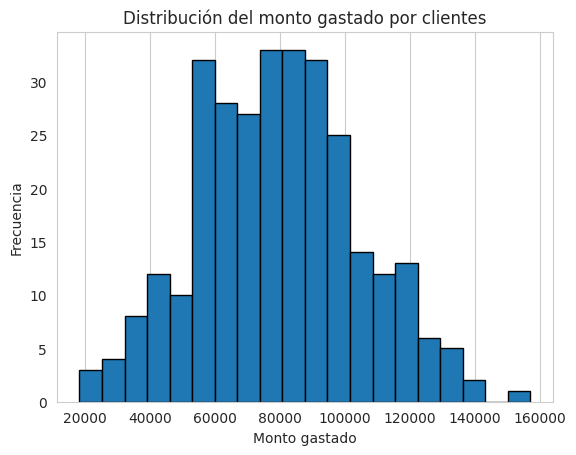

In [98]:
import matplotlib.pyplot as plt

plt.hist(df["monto_gastado"], bins=20, edgecolor="black")
plt.title("Distribución del monto gastado por clientes")
plt.xlabel("Monto gastado")
plt.ylabel("Frecuencia")
plt.grid(axis="y")
plt.show()

## Interpretación del histograma

En este gráfico se observa la distribución del monto gastado por los clientes.

La mayor concentración de valores se encuentra aproximadamente entre 60.000 y 90.000 pesos, lo que indica que la mayoría de los clientes gasta dentro de ese rango.

El centro de la distribución está cercano a los 80.000 pesos, donde se observa una de las frecuencias más altas del gráfico.

También se pueden observar algunos valores más altos, lo que indica que existen clientes que gastan bastante más que el promedio, aunque son menos frecuentes.

En general, la distribución se ve relativamente concentrada alrededor del promedio, con algunos valores extremos.


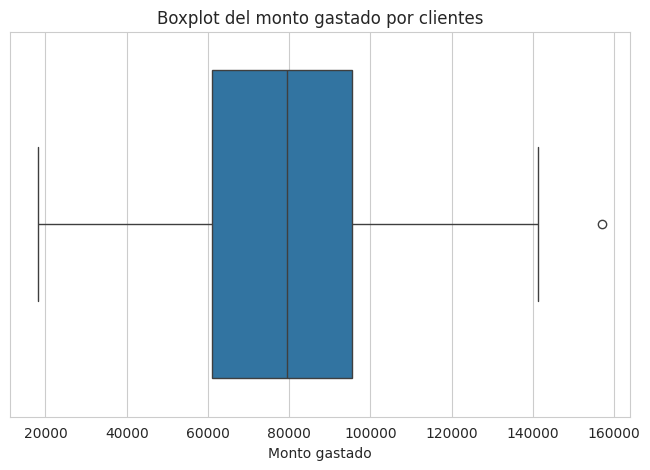

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=df["monto_gastado"])

plt.title("Boxplot del monto gastado por clientes")
plt.xlabel("Monto gastado")
plt.show()

## Interpretación del boxplot

El boxplot permite observar la distribución del monto gastado por los clientes y detectar posibles valores atípicos.

La mayor parte de los datos se concentra aproximadamente entre 60.000 y 95.000 pesos, lo que se observa dentro de la caja del gráfico.

La mediana se encuentra cerca del centro de la caja, lo que indica que los valores están relativamente equilibrados alrededor del gasto promedio.

Además, se observa un punto fuera del rango principal cercano a los 160.000 pesos, lo que corresponde a un valor atípico (outlier). Esto indica que existe al menos un cliente que gastó bastante más que el resto.


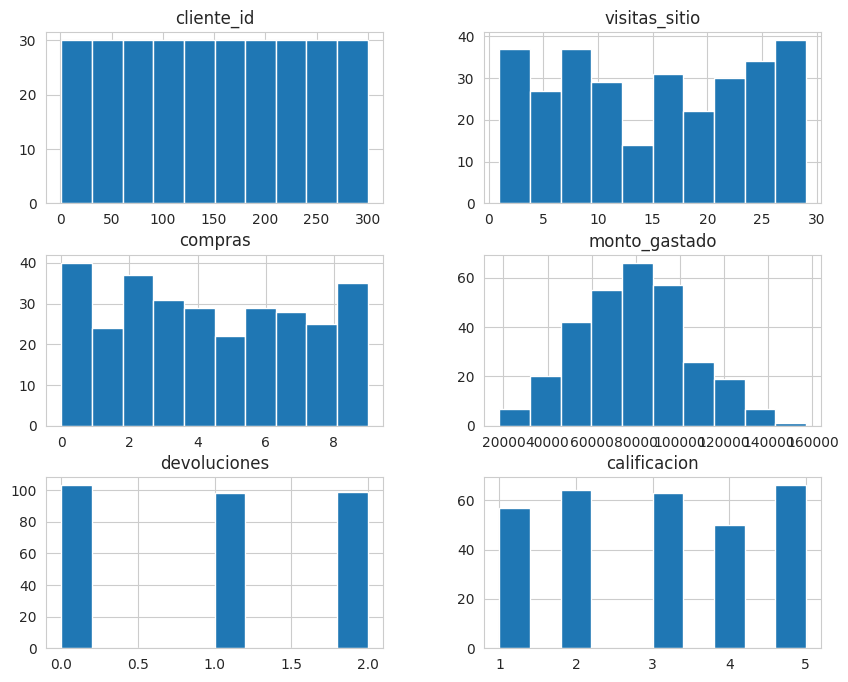

In [100]:
df.hist(figsize=(10,8))
plt.show()

##Interpretación general de las distribuciones

Los histogramas permiten observar cómo se distribuyen las distintas variables del dataset.
En general, las variables presentan distribuciones relativamente equilibradas dentro de los rangos definidos al momento de generar el dataset.

En el caso de monto_gastado se observa una mayor concentración de valores en torno a los 80.000, lo cual coincide con la media del conjunto de datos.

Este tipo de visualización permite identificar rápidamente patrones generales y posibles valores extremos en los datos.

# Lección 3: Correlación

## Objetivo
En esta etapa se busca identificar si existe relación entre las variables numéricas del dataset.
Para ello se analizarán las correlaciones entre las variables utilizando medidas estadísticas y visualizaciones, con el fin de detectar posibles asociaciones entre el comportamiento de los clientes.


## Cálculo de la matriz de correlación

En este paso se calculará la matriz de correlación entre las variables numéricas del dataset.
Esto permitirá identificar si existe relación entre variables como las visitas al sitio, la cantidad de compras y el monto gastado por los clientes.


In [101]:
corr = df.corr()

corr

,cliente_id,visitas_sitio,compras,monto_gastado,devoluciones,calificacion
cliente_id,1.000000,-0.068179,0.053848,-0.022140,-0.042878,0.063807
visitas_sitio,-0.068179,1.000000,-0.122912,-0.037740,0.002483,-0.108392
compras,0.053848,-0.122912,1.000000,-0.058989,0.011395,0.033553
monto_gastado,-0.022140,-0.037740,-0.058989,1.000000,0.039599,0.008767
devoluciones,-0.042878,0.002483,0.011395,0.039599,1.000000,-0.011282
calificacion,0.063807,-0.108392,0.033553,0.008767,-0.011282,1.000000


In [102]:
df["compras"].corr(df["monto_gastado"])

np.float64(-0.05898932144781232)

## Interpretación de la matriz de correlación

Al calcular la matriz de correlación se observa que los valores se encuentran cercanos a 0, lo que indica que no existen relaciones fuertes entre las variables del dataset.

Por ejemplo, la relación entre visitas al sitio y compras es de aproximadamente -0.12, lo que sugiere una correlación negativa muy débil.

En general, los resultados indican que las variables analizadas presentan asociaciones bajas, por lo que no se observa una dependencia clara entre el comportamiento de visitas, compras o monto gastado.

##Coeficiente de correlación de Pearson

El coeficiente de correlación de Pearson permite medir la relación lineal entre dos variables numéricas.

En este dataset, la correlación entre el número de compras y el monto gastado es aproximadamente -0.05, lo que indica una relación prácticamente nula entre ambas variables.

Esto significa que el aumento en el número de compras no necesariamente está asociado a un mayor gasto total.


##Correlaciones espurias

Al revisar la matriz de correlación no se observan relaciones fuertes entre las variables. Los coeficientes de correlación son cercanos a cero, lo que indica que las variables no presentan asociaciones relevantes.

Por lo tanto, en este dataset no se identifican correlaciones espurias evidentes, ya que ninguna variable parece estar fuertemente relacionada con otra.

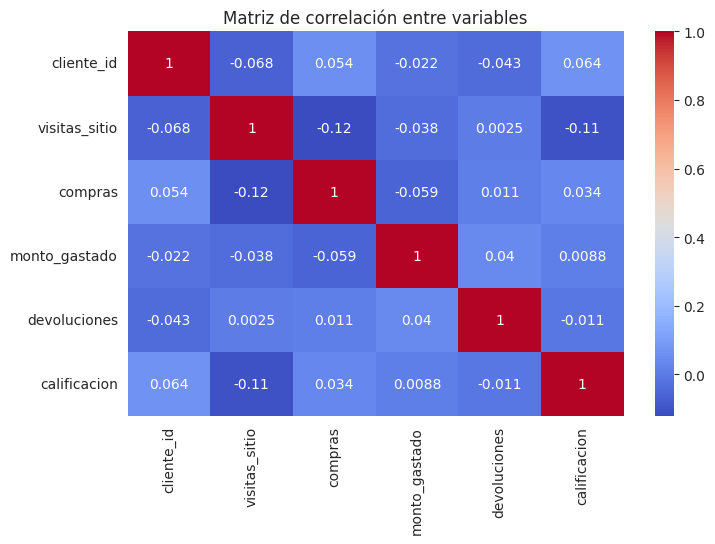

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title("Matriz de correlación entre variables")
plt.show()

##Interpretación visual de la correlación

En el mapa de calor se observa que la diagonal principal aparece en color rojo con valor 1, lo cual es normal porque cada variable está perfectamente correlacionada consigo misma.

En el resto de las celdas van predominando tonos azules claros, lo que indica que las correlaciones entre las variables son débiles o cercanas a cero.

Esto sugiere que en este dataset no existen relaciones fuertes entre variables como visitas al sitio, número de compras o monto gastado.

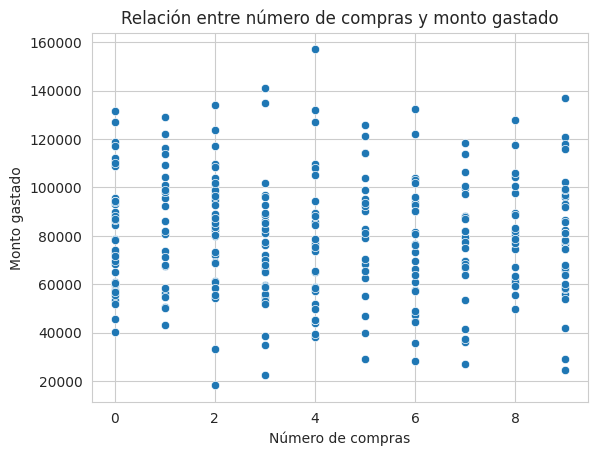

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="compras", y="monto_gastado", data=df)

plt.title("Relación entre número de compras y monto gastado")
plt.xlabel("Número de compras")
plt.ylabel("Monto gastado")

plt.show()

##Interpretación del scatter plot

En el gráfico de dispersión se puede observar la relación entre el número de compras realizadas por los clientes y el monto total gastado.

Los puntos aparecen bastante dispersos y no se aprecia una tendencia clara entre ambas variables. Esto sugiere que en este dataset no existe una relación fuerte entre la cantidad de compras y el monto gastado.

En otras palabras, realizar más compras no necesariamente implica que el cliente gaste más dinero.

# Lección 4: Regresiones lineales

## Objetivo
En esta etapa se busca analizar si existe una relación entre variables del dataset mediante un modelo de regresión lineal.
La regresión permite evaluar si una variable puede ayudar a explicar o predecir el comportamiento de otra variable.

In [105]:
from sklearn.linear_model import LinearRegression

X = df[["compras"]]
y = df["monto_gastado"]

modelo = LinearRegression()
modelo.fit(X, y)

print("Intercepto:", modelo.intercept_)
print("Coeficiente:", modelo.coef_[0])

Intercepto: 81530.24724235738
Coeficiente: -487.22593909924507


El modelo de regresión lineal intenta explicar el monto gastado por los clientes a partir del número de compras realizadas.

El intercepto obtenido es 81530, lo que representa el valor estimado del monto gastado cuando el número de compras es cero.

Por otro lado, el coeficiente asociado a la variable compras es -487, lo que indica que, según este modelo, cada compra adicional se asocia con una disminución aproximada de 487 unidades en el monto gastado.

Sin embargo, este resultado debe interpretarse con cautela, ya que en el análisis previo de correlación y en el gráfico de dispersión no se observó una relación clara entre ambas variables. Esto sugiere que el número de compras no explica de manera significativa el monto total gastado en este dataset.

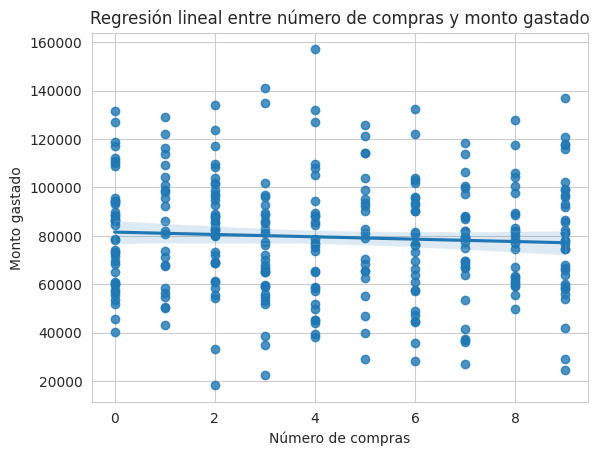

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="compras", y="monto_gastado", data=df)

plt.title("Regresión lineal entre número de compras y monto gastado")
plt.xlabel("Número de compras")
plt.ylabel("Monto gastado")

plt.show()

## Interpretación de la regresión lineal

El gráfico muestra la relación entre el número de compras y el monto gastado, junto con la línea de regresión estimada por el modelo.
La línea presenta una leve pendiente negativa, lo que indica que el modelo estima una pequeña disminución del monto gastado a medida que aumenta el número de compras.
Sin embargo, los puntos se observan bastante dispersos alrededor de la línea, lo que confirma que la relación entre ambas variables es débil. Esto coincide con el análisis de correlación realizado anteriormente.

En conclusión, el número de compras no parece ser una variable que explique de forma significativa el monto total gastado por los clientes en este dataset.

## Conclusión de la regresión

A partir del modelo de regresión lineal aplicado entre el número de compras y el monto gastado, se observa que la pendiente del modelo es negativa y muy pequeña.

Esto indica que no existe una relación significativa entre ambas variables en el dataset analizado. Los resultados del modelo coinciden con lo observado anteriormente en el análisis de correlación y en el gráfico de dispersión.

Por lo tanto, en este conjunto de datos el número de compras no permite explicar de manera clara el monto total gastado por los clientes.

In [107]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = modelo.predict(X)

print("R2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))

R2: 0.0034797400448732807
MSE: 603987899.2820204
MAE: 19668.75405594826


# Evaluación del modelo de regresión

Para evaluar el desempeño del modelo de regresión lineal se calcularon tres métricas: R², MSE y MAE.

El valor de R² obtenido es aproximadamente 0.003, lo que indica que el modelo explica una proporción muy pequeña de la variabilidad del monto gastado. En términos simples, el número de compras casi no explica el comportamiento del monto gastado en este dataset.

El MSE (error cuadrático medio) es cercano a 603.987.899, lo que refleja que existe una diferencia considerable entre los valores reales y los valores estimados por el modelo.

Por su parte, el MAE (error absoluto medio) es de aproximadamente 19.668, lo que significa que en promedio el modelo se equivoca cerca de esa cantidad al estimar el monto gastado.

En conjunto, estas métricas confirman que el modelo de regresión lineal no logra explicar de forma adecuada el monto gastado a partir del número de compras.

In [108]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)

modelo_sm = sm.OLS(y, X_sm).fit()

print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          monto_gastado   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.041
Date:                Mon, 23 Feb 2026   Prob (F-statistic):              0.309
Time:                        21:57:45   Log-Likelihood:                -3458.5
No. Observations:                 300   AIC:                             6921.
Df Residuals:                     298   BIC:                             6928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.153e+04   2514.714     32.421      0.0

# Evaluación del modelo con Statsmodels

Para complementar el análisis de regresión se utilizó la librería statsmodels, la cual permite obtener un resumen estadístico más completo del modelo.

En los resultados se observa que el coeficiente asociado a la variable "compras" es aproximadamente -487, lo que indica que el modelo estima una leve disminución del monto gastado a medida que aumenta el número de compras.

Sin embargo, el valor p (P>|t|) asociado a esta variable es 0.309, el cual es mayor al nivel de significancia común de 0.05. Esto significa que la variable "compras" no resulta estadísticamente significativa para explicar el monto gastado en este modelo.

Además, el valor de R² es cercano a 0.003, lo que confirma que el modelo explica una proporción muy baja de la variación del monto gastado.

En conclusión, los resultados del modelo indican que el número de compras no es un buen predictor del monto gastado en este dataset, lo cual coincide con lo observado previamente en el análisis de correlación y en el gráfico de dispersión.

# Lección 5: Análisis visual de datos

## Objetivo

En esta etapa se utilizan visualizaciones más avanzadas para explorar las relaciones entre múltiples variables del dataset.

A través de herramientas de la librería Seaborn es posible analizar patrones, distribuciones y posibles agrupaciones en los datos, lo que permite obtener una comprensión más visual del comportamiento de los clientes.


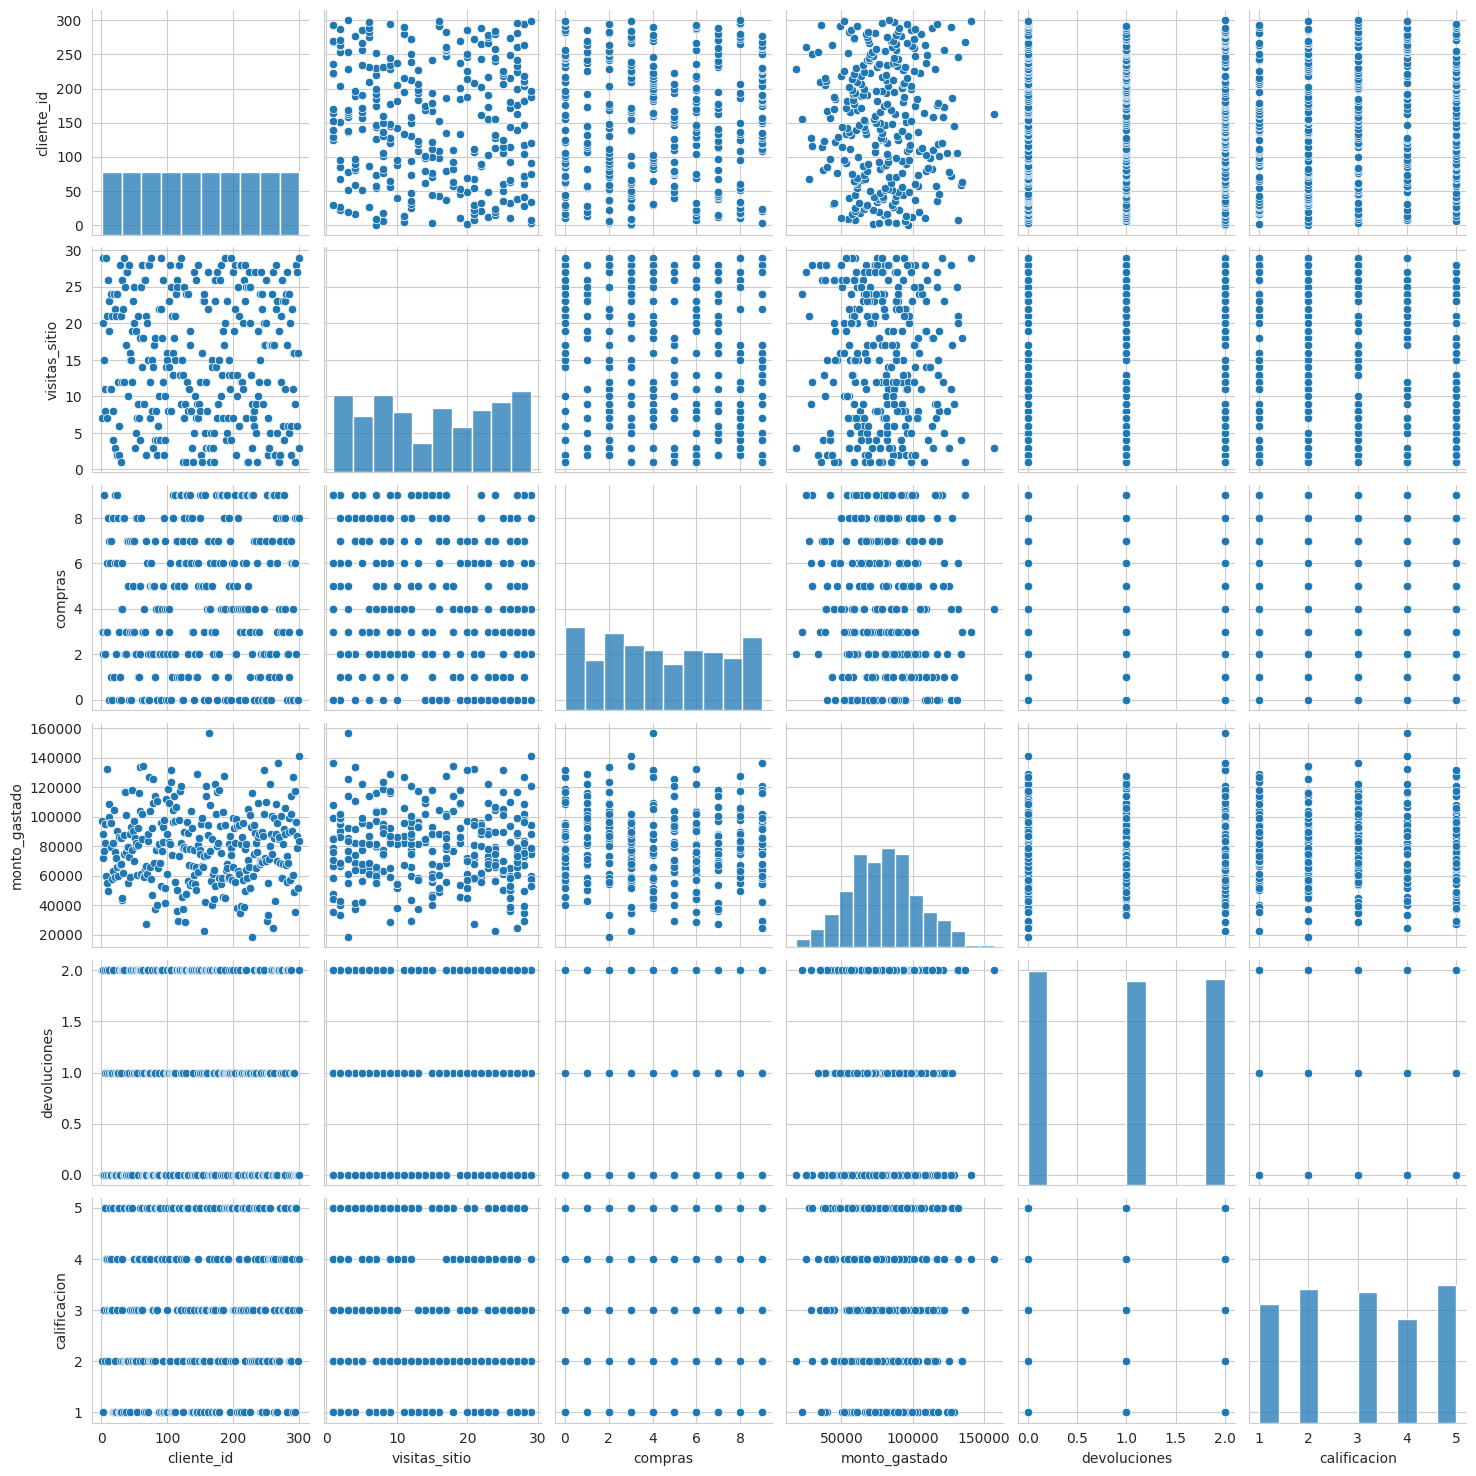

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

plt.show()

## Interpretación del pairplot

El pairplot permite observar la relación entre todas las variables numéricas del dataset al mismo tiempo.

En la diagonal del gráfico se muestran histogramas que representan la distribución de cada variable. En los demás cuadros se observan gráficos de dispersión que muestran cómo se relacionan las variables entre sí.
En general, los puntos se observan bastante dispersos, lo que sugiere que no existen relaciones fuertes entre la mayoría de las variables del dataset.
Este tipo de visualización es útil en el análisis exploratorio porque permite detectar rápidamente patrones, agrupaciones o posibles relaciones entre variables.

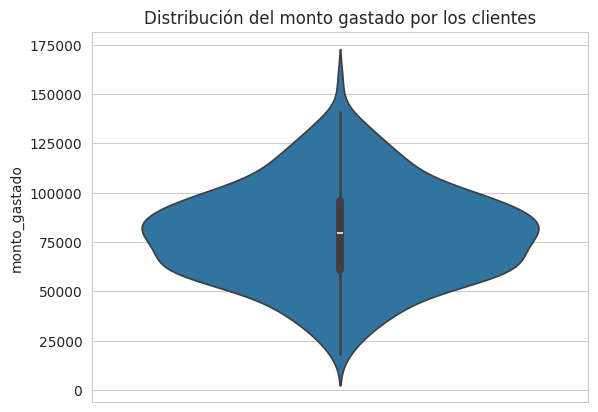

In [110]:
sns.violinplot(y=df["monto_gastado"])

plt.title("Distribución del monto gastado por los clientes")

plt.show()

## Interpretación del violinplot

El violinplot muestra la distribución del monto gastado por los clientes.
La forma del gráfico se ensancha principalmente entre los valores cercanos a 50.000 y 100.000, lo que indica que en ese rango se concentra la mayor cantidad de clientes.

Esto significa que la mayoría de los clientes gasta aproximadamente dentro de ese intervalo. Los extremos del gráfico son más delgados, lo que sugiere que existen menos clientes con montos muy bajos o muy altos de gasto.


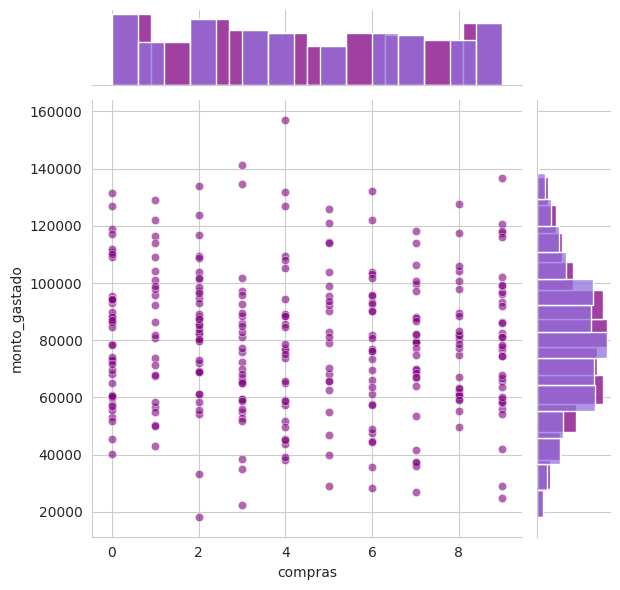

In [111]:
sns.set_style("whitegrid")

g = sns.jointplot(
    x="compras",
    y="monto_gastado",
    data=df,
    kind="scatter",
    height=6,
    color="purple"
)

g.plot_marginals(sns.histplot, color="mediumpurple", bins=15)

g.ax_joint.collections[0].set_alpha(0.6)

plt.show()

## Interpretación del jointplot

El gráfico muestra la relación entre el número de compras realizadas por los clientes y el monto gastado. Se observa que muchos puntos aparecen alineados en columnas verticales. Esto ocurre porque la variable "compras" solo toma valores enteros, por lo que varios clientes tienen la misma cantidad de compras pero distintos montos gastados.

En general los puntos se encuentran distribuidos sin una tendencia clara. Esto refuerza lo observado en el análisis anterior: el número de compras no parece tener una relación fuerte con el monto total gastado.
Los histogramas en los bordes permiten ver la distribución de cada variable de forma individual.

Los colores se utilizan únicamente para diferenciar visualmente las observaciones en el gráfico.

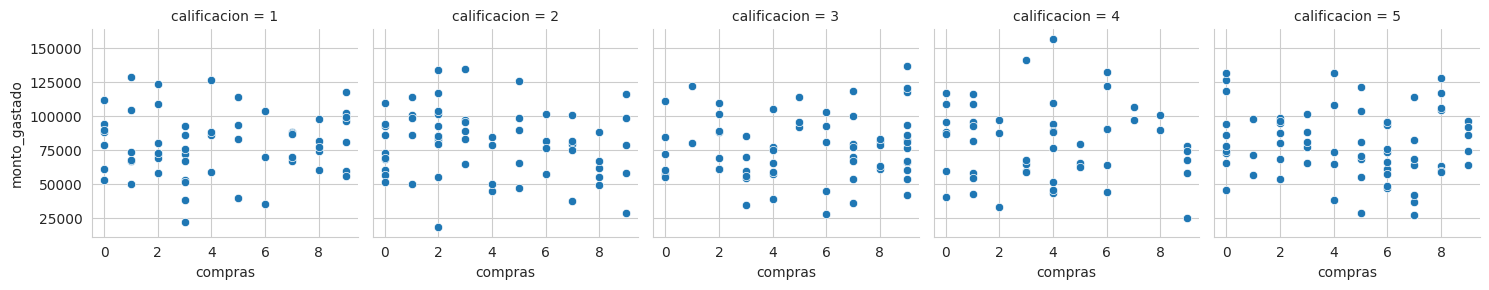

In [112]:
g = sns.FacetGrid(df, col="calificacion")
g.map(sns.scatterplot, "compras", "monto_gastado")

plt.show()

## Interpretación del FacetGrid

El gráfico muestra la relación entre número de compras y monto gastado, pero segmentado según la calificación que los clientes entregan al servicio.

Se observan cinco gráficos separados, uno para cada nivel de calificación entre 1 y 5. En general los puntos siguen apareciendo dispersos, lo que indica que no existe una relación fuerte entre el número de compras y el monto gastado.

Sin embargo, en la categoría de calificación 5 los puntos se ven un poco más concentrados, lo que podría indicar un comportamiento algo más homogéneo en los clientes que evalúan mejor el servicio. Este tipo de visualización permite comparar patrones entre distintos grupos de clientes y facilita identificar posibles diferencias entre segmentos.


# Lección 6: Librería Matplotlib

## Objetivo

En esta etapa se utilizará la librería Matplotlib para crear visualizaciones personalizadas que permitan mejorar la presentación de los resultados del análisis exploratorio de datos. Aquí se permite controlar distintos elementos de un gráfico, como títulos, etiquetas, escalas, anotaciones y formatos de exportación. Esto facilita comunicar de forma más clara los hallazgos obtenidos durante el análisis.


#Creación de un gráfico con Matplotlib

En este paso se crea un gráfico de dispersión para visualizar la relación entre el número de compras realizadas por los clientes y el monto total gastado. Además se agregan elementos de personalización como límites en los ejes, anotaciones y etiquetas para mejorar la interpretación del gráfico.


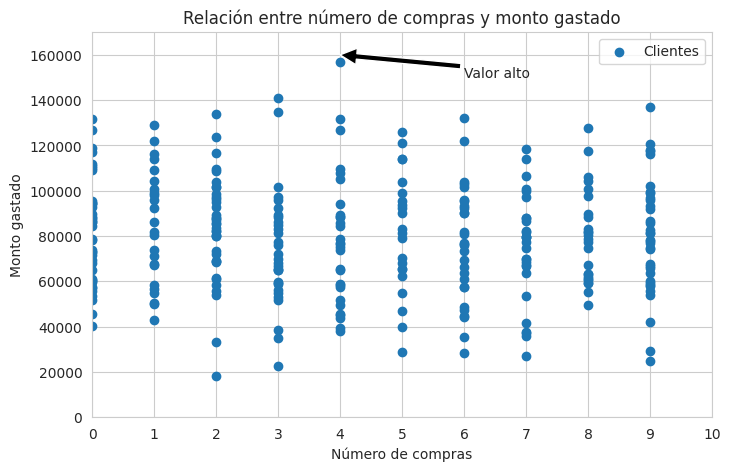

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.scatter(df["compras"], df["monto_gastado"], label="Clientes")

plt.title("Relación entre número de compras y monto gastado")
plt.xlabel("Número de compras")
plt.ylabel("Monto gastado")

plt.xticks(range(0,11))
plt.yticks(range(0,180000,20000))

plt.xlim(0,10)
plt.ylim(0,170000)

plt.annotate("Valor alto",
             xy=(4,160000),
             xytext=(6,150000),
             arrowprops=dict(facecolor='black'))

plt.legend()

plt.show()

# Interpretación del gráfico

El gráfico de dispersión muestra la relación entre el número de compras realizadas por los clientes y el monto total gastado. Cada punto representa un cliente dentro del conjunto de datos.

Los puntos se encuentran distribuidos de forma dispersa, lo que indica que no existe una relación clara entre la cantidad de compras y el monto total gastado.

También se observa un valor alto cercano a los 160000, el cual fue destacado mediante una anotación para identificar visualmente un posible valor atípico dentro del dataset.

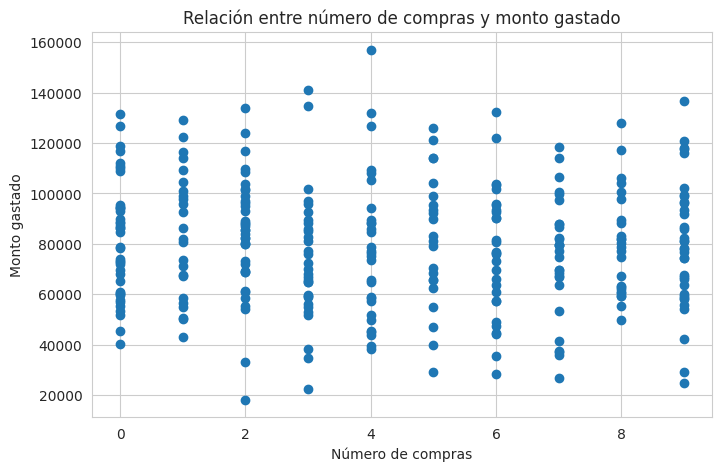

In [114]:
plt.figure(figsize=(8,5))

plt.scatter(df["compras"], df["monto_gastado"])

plt.title("Relación entre número de compras y monto gastado")
plt.xlabel("Número de compras")
plt.ylabel("Monto gastado")

plt.savefig("grafico_compras_vs_gasto.png")

plt.show()

# Exportación del gráfico

Una de las ventajas de Matplotlib es que permite guardar las visualizaciones generadas para utilizarlas posteriormente en informes o presentaciones.

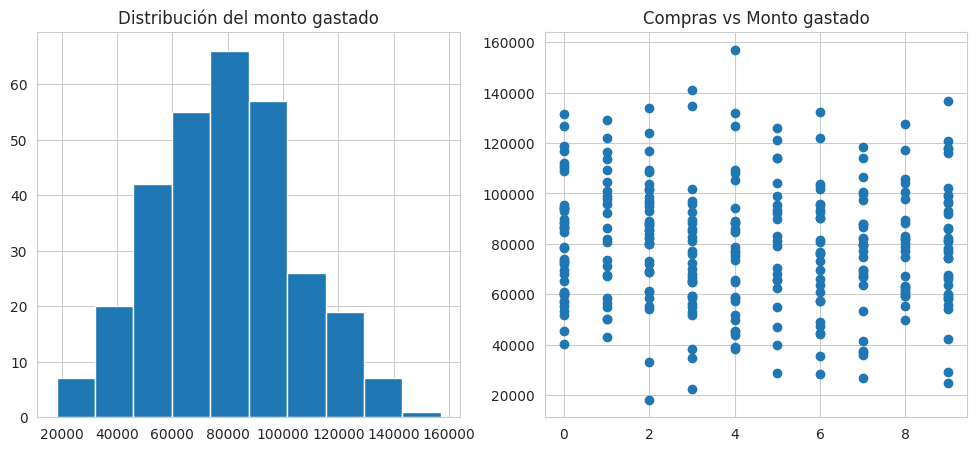

In [115]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

axes[0].hist(df["monto_gastado"])
axes[0].set_title("Distribución del monto gastado")

axes[1].scatter(df["compras"], df["monto_gastado"])
axes[1].set_title("Compras vs Monto gastado")

plt.show()

# Uso de subplots

Matplotlib permite mostrar múltiples gráficos en una misma figura mediante el uso de subplots. Esto facilita comparar diferentes visualizaciones del dataset.

# Interpretación de los subplots

En el primer gráfico se observa la distribución del monto gastado por los clientes. La mayor concentración de valores se encuentra aproximadamente entre los 60000 y 90000.

En el segundo gráfico se visualiza nuevamente la relación entre número de compras y monto gastado. Los puntos se observan dispersos, lo que refuerza la idea de que no existe una relación fuerte entre ambas variables.

## Conclusiones del análisis

Durante el desarrollo del análisis exploratorio de datos se pudieron identificar distintas características del comportamiento de los clientes dentro del dataset.

A través del uso de estadísticas descriptivas, análisis de correlación, modelos de regresión y visualizaciones gráficas fue posible comprender la distribución de las variables y analizar posibles relaciones entre ellas.

Los resultados indican que variables como el número de compras no presentan una relación fuerte con el monto total gastado. Esto fue observado tanto en los gráficos de dispersión como en los resultados de correlación y regresión.

Las visualizaciones generadas con las librerías Seaborn y Matplotlib permitieron representar los datos de forma clara y facilitar la interpretación de los resultados.

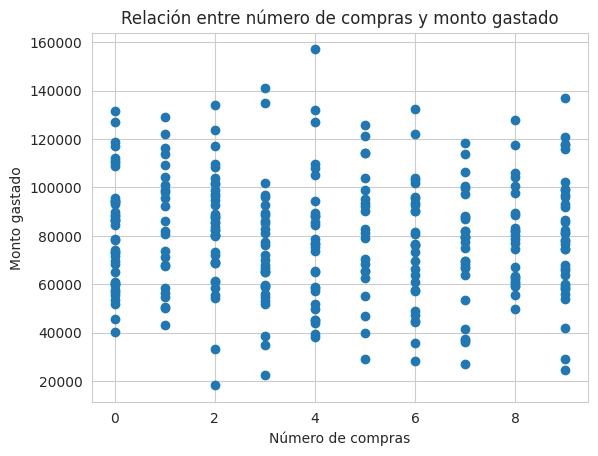

In [116]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(df["compras"], df["monto_gastado"])

plt.title("Relación entre número de compras y monto gastado")
plt.xlabel("Número de compras")
plt.ylabel("Monto gastado")

plt.savefig("grafico_scatter_compras_gasto.png")

plt.show()

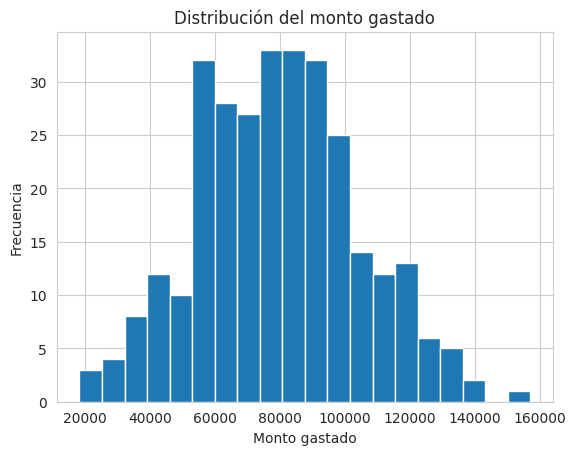

In [117]:
plt.figure()

plt.hist(df["monto_gastado"], bins=20)

plt.title("Distribución del monto gastado")
plt.xlabel("Monto gastado")
plt.ylabel("Frecuencia")

plt.savefig("histograma_monto_gastado.png")

plt.show()

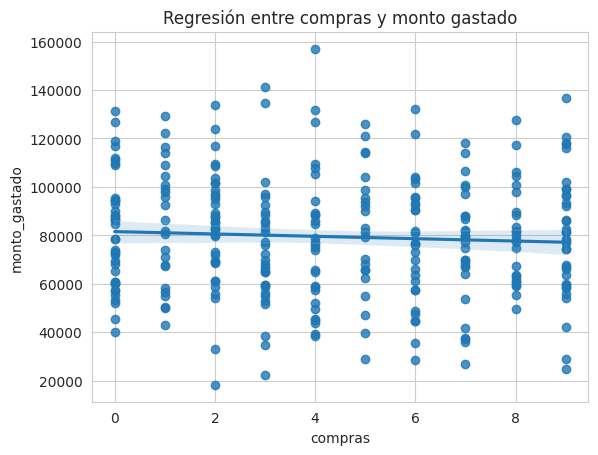

In [118]:
import seaborn as sns

plt.figure()

sns.regplot(x="compras", y="monto_gastado", data=df)

plt.title("Regresión entre compras y monto gastado")

plt.savefig("regresion_compras_gasto.png")

plt.show()


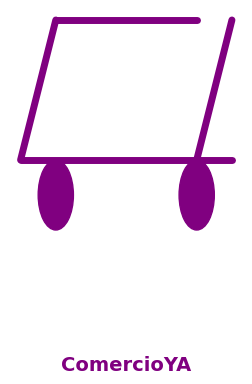

In [119]:
import matplotlib.pyplot as plt

# Crear figura
fig, ax = plt.subplots(figsize=(3,3))

# Dibujar un carrito simple con líneas
ax.plot([0.2,0.8], [0.5,0.5], color='purple', linewidth=5)  # base del carrito
ax.plot([0.2,0.3], [0.5,0.7], color='purple', linewidth=5)  # lado izquierdo
ax.plot([0.7,0.8], [0.5,0.7], color='purple', linewidth=5)  # lado derecho
ax.plot([0.3,0.7], [0.7,0.7], color='purple', linewidth=5)  # parte superior

# Ruedas
circle1 = plt.Circle((0.3,0.45), 0.05, color='purple')
circle2 = plt.Circle((0.7,0.45), 0.05, color='purple')
ax.add_patch(circle1)
ax.add_patch(circle2)

# Texto
ax.text(0.5, 0.2, 'ComercioYA', fontsize=14, ha='center', color='purple', fontweight='bold')

# Quitar ejes
ax.axis('off')

# Guardar
plt.savefig('logo_comercioYA.png', dpi=150, bbox_inches='tight')
plt.show()